In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
cars=pd.read_csv("C:/Datasets/mtcars/mtcars.csv")
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
cars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [4]:
y=cars.am
x=cars.loc[:,['mpg','hp','wt']] #based on business knowledge we picked these three

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [6]:
model=LogisticRegression()

In [7]:
model.fit(x_train,y_train)

c:\users\sudhe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_predict=model.predict(x_test)

In [9]:
y_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [10]:
y_test

20    0
7     0
5     0
2     1
3     0
21    0
13    0
28    1
12    0
1     1
Name: am, dtype: int64

In [11]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test,y_predict)

array([[6, 1],
       [0, 3]], dtype=int64)

In [15]:
from sklearn.metrics import roc_auc_score

In [16]:
from sklearn.metrics import roc_curve

In [18]:
# prob for lr model we used
lrprob=model.predict_proba(x_test)
lrprob

array([[0.31098083, 0.68901917],
       [0.58657412, 0.41342588],
       [0.84329923, 0.15670077],
       [0.21540238, 0.78459762],
       [0.61758209, 0.38241791],
       [0.86155824, 0.13844176],
       [0.88460774, 0.11539226],
       [0.45513215, 0.54486785],
       [0.81828174, 0.18171826],
       [0.48191243, 0.51808757]])

In [19]:
# prob for no skill 
nsprob=np.zeros(len(x_test))
nsprob

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
lr_fpr,lr_tpr,threshold=roc_curve(y_test,lrprob[:,1]) # for positive outcomes

In [25]:
ns_fpr,ns_tpr,thresholdns=roc_curve(y_test,nsprob)

In [26]:
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

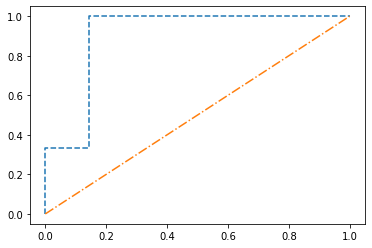

In [29]:
plt.plot(lr_fpr,lr_tpr,linestyle='--',label='lr')
plt.plot(ns_fpr,ns_tpr,linestyle='-.',label='ns')
plt.show()

# threshold here are
- thresholds : array, shape = [n_thresholds]
    Decreasing thresholds on the decision function used to compute
    fpr and tpr. `thresholds[0]` represents no instances being predicted
    and is arbitrarily set to `max(y_score) + 1`.

In [32]:
print(threshold,thresholdns) 

[1.78459762 0.78459762 0.68901917 0.51808757 0.11539226] [1. 0.]


In [31]:
auc_lr=roc_auc_score(y_test,lrprob[:,1])
auc_ns=roc_auc_score(y_test,nsprob)
print(auc_lr,auc_ns)

0.9047619047619049 0.5


In [36]:
cars.am.value_counts()

0    19
1    13
Name: am, dtype: int64

 # almost a balanced dataset so we used roc and auc instead of precision-recall